# One dimentional Kalman Filter

In [33]:
%matplotlib inline

import numpy as np
import filterpy.stats as stats
from random import random
import matplotlib.pyplot as plt
from collections import namedtuple
import kf_book.kf_internal as kf_internal
from numpy.random import randn
from ipywidgets import interact
from ipywidgets import IntSlider
from ipywidgets import FloatSlider
from kf_book import book_plots as book_plots
from kf_book.kf_internal import DogSimulation

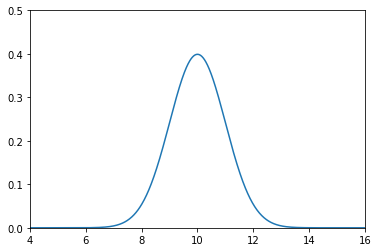

In [2]:
stats.plot_gaussian_pdf(mean = 10, variance = 1, xlim = (4, 16), ylim = (0, 0.5))

## Belief of Gaussian

Mean of readings is 10.002


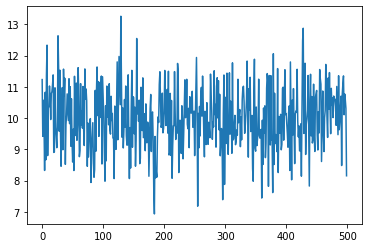

In [3]:
xs = range(500)
ys = randn(500) * 1 + 10
plt.plot(xs, ys)
print('Mean of readings is {:.3f}'.format(np.mean(ys)))

## Tracking with Gaussian probability

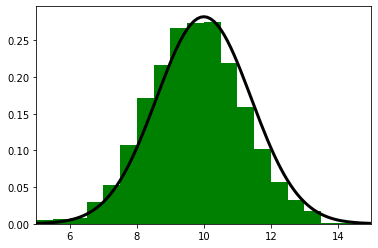

In [4]:
kf_internal.gaussian_vs_histogram()

<font size="5">In Discrete Bayes

Predict Step</font>

$$\huge \bar{x} = x \times f(x)$$

<font size="5">Update Step</font>

$$\huge x = \lvert \lvert L \bar{x} \rvert \rvert$$

<font size="5">In Gaussian</font>

<font size="5">Predict Step</font>

$$\huge \hat{x}_{N} = x_{N} \bigoplus f_{x_{N}}(\cdot)$$

<font size="5">Update Step</font>

$$\huge x_{N} = L \bigoplus \bar{x_{N}}$$</font>

### Example 

$$\huge \begin{align}
\bar{x} &= x_{k-1} + v_{k}\Delta t \\
        &= x_{k-1} + f_{x}
\end{align}$$

<font size="5">Assume</font>

$$\huge \begin{align}
f_{x} &= v\Delta t = 15 \times 2 \\
\bar{x}_{k} &= 10 + (15 \times 2) = 40
\end{align}$$

<font size="5">We are unvertain about current position and  velocity. We  need to express the uncertainty with a Gaussian

We define x as a Gaussian, dog is at 10 m, and the standard diviation of our uncertainty is 0.2 m. we can get:</font>

$$\huge x = N(10, 0.2^2)$$

<font size="5">We define fx as a Gaussian, dog's velocity is 15m/s. and the standard diviation of our uncertainty is 0.7 m/s, we can get:</font>

$$\huge f_{x} = N(15, 0.7^2)$$ 

<font size="5">The equation for the prior is </font>

$$\huge \bar{x} = x + f_{x}$$

<font size="5">According to equation of sum of Gaussian distribution</font>

$$\huge \mu = \mu_{1} + \mu_{2}$$

$$\huge \sigma^{2} = \sigma^{2}_{1} + \sigma^{2}_{2}$$

<font size="5">We can get:</font>

$$\huge \bar{x} = \mu_{x} + \mu_{f_{x}} = 10 + 15 = 25$$

$$\huge \bar{\sigma}^{2} = \sigma_{x}^{2} + \sigma_{f_{x}}^{2} = 0.2^2 + 0.7^2 = 0.53$$

In [5]:
gaussian = namedtuple('Gaussian', ['mean', 'var'])
gaussian.__repr__ = lambda s: '={:.3f}, s = {:.3f}'.format(s[0], s[1])

g1 = gaussian(3.4, 10.1)
g2 = gaussian(mean = 4.5, var = 0.2**2)

print(g1)
print(g2)

=3.400, s = 10.100
=4.500, s = 0.040


In [6]:
gaussian = namedtuple('Gaussian', ['mean', 'var'])

def gaussian_repr(self):
    return 'Mean ={:.3f}, variance = {:.3f}'.format(self[0], self[1])

gaussian.__repr__ = gaussian_repr

def predict(pos, movement):
    return gaussian(pos.mean + movement.mean, pos.var + movement.var)

In [7]:
pos = gaussian(10.0, 0.2 ** 2)
move = gaussian(15.0, 0.7 ** 2)
predict(pos, move)

Mean =25.000, variance = 0.530

<font size="5">In Discrete Bayes</font>

$$\huge Posterior = normalized(likelihood \times prior)$$

<font size="5">In Gaussian</font>

$$\huge x = \lvert \lvert L\bar{x} \rvert \rvert$$

<font size="5">L is the likelihood, which represent the probability of the measurement given the current state. If sensor states that dog is at 23 m, with a standard deviation of 0.4 m, the likelihood is</font>

$$\huge z = N(23, 0.16^2)$$

<font size="5">According to equation of product of the Gaussian</font>

$$\huge \mu = \frac{\sigma_{1}^{2}\mu_{2} + \sigma_{2}^{2}\mu_{1}}{\sigma_{1}^{2} + \sigma_{2}^{2}}$$

$$\huge \sigma^{2} = \frac{\sigma_{1}^{2}\sigma_{2}^{2}}{\sigma_{1}^{2} + \sigma_{2}^{2}}$$

$$\huge \begin{align}
N(\mu, \sigma^{2}) &= \lvert \lvert prior \cdot likelihood \rvert \rvert \\
&= N(\bar{\mu}, \bar{\sigma}^{2}) \cdot N(\mu_{z}, \sigma_{z}^2) \\
&= N(\frac{\bar{\sigma}^2\mu_{z} + \sigma_{z}^{2}\bar{\mu}}{\bar{\sigma}^{2} + \sigma_{z}^{2}}, \frac{\bar{\sigma}^2\sigma_{z}^2}{\bar{\sigma}^{2} + \sigma_{z}^{2}})
\end{align}$$

In [8]:
def gaussian_multipy(g1, g2):
    mean = (g1.var * g2.mean + g2.var * g1.mean)/(g1.var + g2.var)
    variance = (g1.var*g2.var)/(g1.var + g2.var)
    return gaussian(mean, variance)

def update(prior, likelihood):
    posterior = gaussian_multipy(prior, likelihood)
    return posterior 

In [9]:
update(pos, move)

Mean =10.377, variance = 0.037

In [10]:
def update_dog(dog_pos, measurement):
    estimated_pos = gaussian_multiply(measurement, dog_pos)
    return estimated_pos

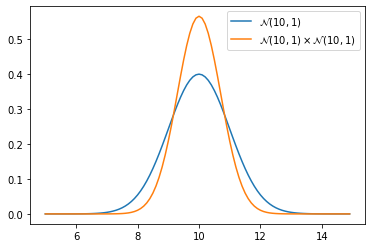

In [11]:
z = gaussian(10, 1)
product = gaussian_multipy(z, z)

xs = np.arange(5, 15, 0.1)
ys = [stats.gaussian(x, z.mean, z.var) for x in xs]
plt.plot(xs, ys, label = '$\mathcal{N}(10, 1)$')

ys = [stats.gaussian(x, product.mean, product.var) for x in xs]
plt.plot(xs, ys, label = '$\mathcal{N}(10, 1) \\times \mathcal{N}(10, 1)$')
plt.legend()

In [12]:
def plot_products(g1, g2):
    plt.figure()
    product = gaussian_multipy(g1, g2)
    
    xs = np.arange(5, 15, 0.01)
    ys = [stats.gaussian(x, g1.mean, g1.var) for x in xs]
    plt.plot(xs, ys, label = '$\mathcal{N}$' + '$({}, {})$'.format(g1.mean, g1.var))
    
    ys = [stats.gaussian(x, g2.mean, g2.var) for x in xs]
    plt.plot(xs, ys, label = '$\mathcal{N}$' + '$({}, {})$'.format(g2.mean, g2.var))
    
    ys = [stats.gaussian(x, product.mean, product.var) for x in xs] 
    plt.plot(xs, ys, ls = '--')
    plt.legend()

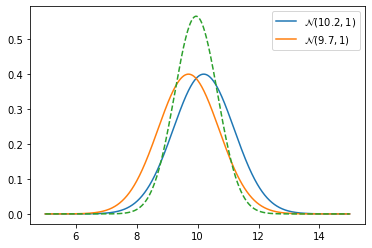

In [13]:
z1 = gaussian(10.2, 1)
z2 = gaussian(9.7, 1)
plot_products(z1, z2)

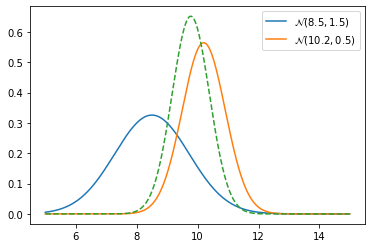

In [14]:
prior, z = gaussian(8.5, 1.5), gaussian(10.2, 0.5)
plot_products(prior, z)

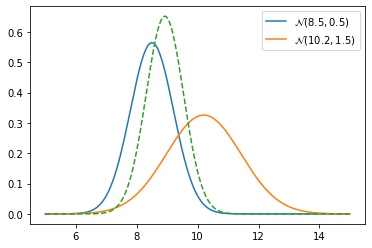

In [15]:
prior, z = gaussian(8.5, 0.5), gaussian(10.2, 1.5)
plot_products(prior, z)

In [16]:
def interactive_gaussian(m1, m2, v1, v2):
    g1 = gaussian(m1, v1)
    g2 = gaussian(m2, v2)
    plot_products(g1, g2)
interact(interactive_gaussian, m1 = (5, 10, 0.5), m2 = (10, 15, 0.5), v1 = (0.1, 2, 0.1), v2 = (0.1, 2, 0.1))

interactive(children=(FloatSlider(value=7.0, description='m1', max=10.0, min=5.0, step=0.5), FloatSlider(value…

<function __main__.interactive_gaussian(m1, m2, v1, v2)>

In [17]:
np.random.seed(13)

process_var = 1.0
sensor_var = 2.0

x = gaussian(0, 20 ** 2)
velocity = 1
dt = 1
process_model = gaussian(velocity, process_var)

dog = DogSimulation(
        x0 = x.mean,
        velocity = process_model.mean,
        measurement_var = sensor_var,
        process_var = process_model.var)
zs = [dog.move_and_sense() for _ in range(10)] 

In [18]:
print('PREDICT \t\t\t UPDATE')
print('     x       var\t\t   z\t    x    var')
for z in zs:
    prior = predict(x, process_model)
    likelihood = gaussian(z, sensor_var)
    x = update(prior, likelihood)
    kf_internal.print_gh(prior, x, z)
    print()
print('final estimate:        {:10.3f}'.format(x.mean))
print('actual final position: {:10.3f}'.format(dog.x))

PREDICT 			 UPDATE
     x       var		   z	    x    var
  1.000  401.000	1.354	  1.352   1.990

  2.352    2.990	1.882	  2.070   1.198

  3.070    2.198	4.341	  3.736   1.047

  4.736    2.047	7.156	  5.960   1.012

  6.960    2.012	6.939	  6.949   1.003

  7.949    2.003	6.844	  7.396   1.001

  8.396    2.001	9.847	  9.122   1.000

 10.122    2.000	12.553	 11.338   1.000

 12.338    2.000	16.273	 14.305   1.000

 15.305    2.000	14.800	 15.053   1.000

final estimate:            15.053
actual final position:     14.838


### Animation of the filter

In [19]:
xs, predictions = [], []
process_model = gaussian(velocity, process_var)
x = gaussian(0, 20 ** 2)
for z in zs:
    prior = predict(x, process_model)
    likelihood = gaussian(z, sensor_var)
    x = update(prior, likelihood)
    
    predictions.append(prior.mean)
    xs.append(x.mean)

def plot_filter(step):
    plt.cla()
    step -= 1
    i = step //3 + 1
    
    book_plots.plot_predictions(predictions[:i])
    if step % 3 == 0:
        book_plots.plot_measurements(zs[:i-1])
        book_plots.plot_filter(xs[:i-1])
    elif step % 3 == 1:
        book_plots.plot_measurements(zs[:i])
        book_plots.plot_filter(xs[:i-1])
    else:
        book_plots.plot_measurements(zs[:i])
        book_plots.plot_filter(xs[:i])
    plt.xlim(-1, 20)
    plt.ylim(0, 20)
    plt.legend(loc = 2)
interact(plot_filter, step = IntSlider(value = 1, min = 1, max = len(predictions)*3))

interactive(children=(IntSlider(value=1, description='step', max=30, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot_filter(step)>

	4.4502 2.6507 2.2871 2.1955 2.1712
	2.1647 2.1629 2.1625 2.1623 2.1623
	2.1623 2.1623 2.1623 2.1623 2.1623
	2.1623 2.1623 2.1623 2.1623 2.1623
	2.1623 2.1623 2.1623 2.1623 2.1623


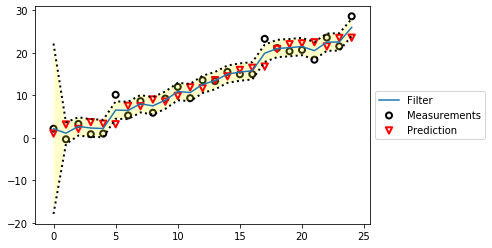

In [20]:
process_var = 2
sensor_var = 4.5
x = gaussian(0, 400)+
process_model = gaussian(1, process_var)
N = 25
dog = DogSimulation(x.mean, process_model.mean, sensor_var, process_var)
zs = [dog.move_and_sense() for _ in range(N)]

xs, priors = np.zeros((N, 2)), np.zeros((N, 2))
for i, z in enumerate(zs):
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, sensor_var))
    priors[i] = prior
    xs[i] = x

book_plots.plot_measurements(zs)
book_plots.plot_filter(xs[:, 0], var = priors[:, 1])
book_plots.plot_predictions(priors[:, 0])
book_plots.show_legend()
kf_internal.print_variance(xs)

## Kalman Gain

<font size="5">Posterior is computed as:</font>

$$\huge x_{k} = L \times \bar{x}$$

<font size="5">Therefore the mean of the posterior is given by:</font>

$$\huge \mu = \frac{\bar{\sigma}^{2}\mu_{z} + \sigma_{z}^{2}\bar{\mu}}{\bar{\sigma}^2 + \sigma_{z}^{2}}$$

<font size="5">rewrite this as:</font>

$$\huge  \mu =  (\frac{\bar{\sigma}^2}{\bar{\sigma}^2 + \sigma_{z}^{2}})\mu_{z} + (\frac{\sigma_{z}^2}{\bar{\sigma}^2 + \sigma_{z}^{2}})\bar{\mu}$$

<font size="5">In this form we can scaling the measurement and the prior by weigths:</font>

$$\huge \mu = W_{1}\mu_{z} + W_2\bar{\mu}$$

<font size="5">Introduce new term,</font> $\LARGE K = W_{1}$

$$\huge \begin{align}
\mu &= K\mu_{z} + (1-K)\bar{\mu} \\
&= \bar{\mu} + K(\mu_{z} - \bar{\mu})
\end{align}$$

<font size="5">Where</font>

$$\huge K = \frac{\bar{\sigma}^{2}}{\bar{\sigma}^2 + \sigma_{z}^{2}}$$

<font size="5">**K** is the **Kalman Gain**</font>

# Algorithm

## Initialization

1. Initialize the state of the filter

2. Initialize the belief in  the state

## Predict

1. Use system behavior to predict state at the next time step

2. Adjust belief to account for the uncertainty in prediction

## Update

1. Get a measurement and associated belief about its accuracy

2. Compute residual between estimated state and measurement 

3. Compute the scaling factor based on whether the measurement or the prediction is more accuracte

4. Set state between the prediction and measurement based on scaling factor

5. Update belief in the state based on how certain we are in the measurement


### Prediction
| <font size="5">Equation &nbsp;&nbsp; </font> | <font size="5">Implementation</font> | <font size="5">Kalman Filter</font> |
| --- | --- | --- |
| $\LARGE \bar{x} = x + f_{x}$ | $\LARGE \begin{align}
\bar{\mu} &= \mu + \mu_{f_{x}}  \\
\bar{\sigma}^2 &= \sigma^{2} + \sigma^{2}_{f_{x}}
\end{align}$ | $\LARGE \begin{align}
\bar{x} &= x + dx \\
\bar{P} &= P + Q
\end{align}$|

### Update

| <font size="5">Equation &nbsp;&nbsp;&nbsp; </font> | <font size="5">Implementation</font> | <font size="5">Kalman Filter</font> |
| --- | --- | --- |
| $\LARGE x = \lvert \lvert L\bar{x}\lvert \lvert $ | $\LARGE \begin{align}
y &= z - \bar{\mu}  \\
K &= \frac{\bar{\sigma}^{2}}{\bar{\sigma}^2 + \sigma_{z}^{2}} \\
\mu &= \bar{\mu} + Ky \\
\sigma^{2} &= \frac{\bar{\sigma}^{2}\sigma_{z}^{2}}{\bar{\sigma}^{2} + \sigma_{z}^{2}} 
\end{align}$ | $\LARGE \begin{align}
y &= z - \bar{x} \\
K &= \frac{\bar{P}}{\bar{P} + R} \\
x &= \bar{x} + Ky \\
P &= (1 - K)\bar{P}
\end{align}$|



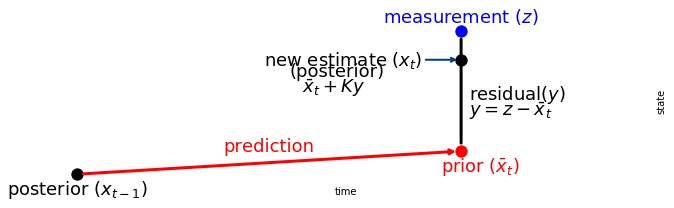

In [21]:
book_plots.show_residual_chart()

In [22]:
def update(prior, measurement):
    x, P = prior         # mean and variance of prior
    z, R = measurement   # mean and variance for measurement
    
    y = z - x            # residual
    K = P /(P + R)       # Kalman Gain
    x = x + K * y        # posterior
    P = (1 - K) * P      # posterior variance
    return gaussian(x, P)

def predict(posterior, movement):
    x, P = posterior     # mean and variance of posterior
    dx, Q = movement     # mean and variance of movement
    x = x + dx
    P = P + Q
    return gaussian(x, P)

(150, 170)

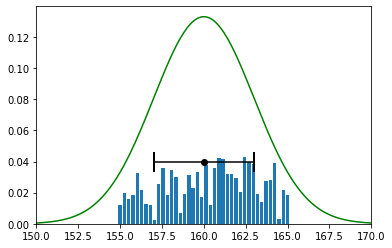

In [23]:
xs = np.arange(145, 190, 0.1)
ys = [stats.gaussian(x, 160, 3**2) for x in xs]
belief = np.array([random() for _ in range(40)])
belief = belief / sum(belief)

x = np.linspace(155, 165, len(belief))
plt.gca().bar(x, belief, width = 0.2)
plt.plot(xs, ys, label = 'A', color = 'g')
plt.errorbar(160, [0.04], xerr = [3], fmt = 'o', color = 'k', capthick = 2, capsize = 10)
plt.xlim(150, 170)

In [24]:
def volt(voltage, std):
    return voltage + (np.random.randn() * std)

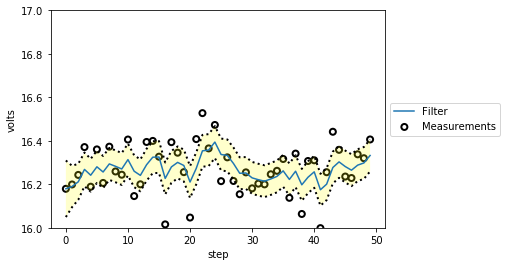

Variance coverges to 0.005


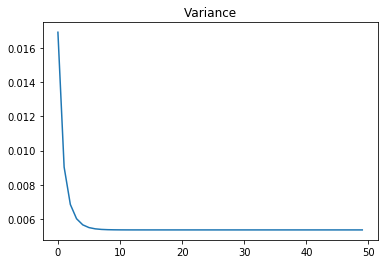

In [25]:
temp_change = 0
voltage_std = 0.13
process_var = 0.05 ** 2
actual_voltage = 16.3

x = gaussian(25, 1000)
process_model = gaussian(0, process_var)

N = 50
zs = [volt(actual_voltage, voltage_std) for i in range(N)]
ps = []
estimates = []

for z in zs:
    prior = predict(x, process_model)
    x = update(prior, gaussian(z, voltage_std ** 2))
    
    estimates.append(x.mean)
    ps.append(x.var)

book_plots.plot_measurements(zs)
book_plots.plot_filter(estimates, var = np.array(ps))
book_plots.show_legend()
plt.ylim(16, 17)
book_plots.set_labels(x = 'step', y = 'volts')
plt.show()

plt.plot(ps)
plt.title('Variance')
print('Variance coverges to {:.3f}'.format(ps[-1]))

## Example: Extreme Amounts of Noise

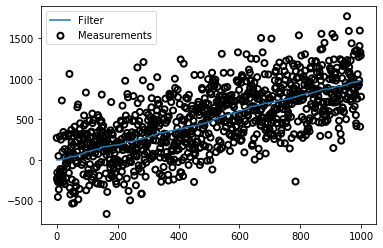

In [26]:
sensor_var = 300 ** 2
process_var = 2
process_model = gaussian(1, process_var)
pos = gaussian(0, 500)
N = 1000
dog = DogSimulation(pos.mean, 1, sensor_var, process_var)
zs = [dog.move_and_sense() for _ in range(N)]
ps = []

for i in range(N):
    prior = predict(pos, process_model)
    pos = update(prior, gaussian(zs[i], sensor_var))
    ps.append(pos.mean)
book_plots.plot_measurements(zs, lw = 1)
book_plots.plot_filter(ps)
plt.legend(loc = 2)

## Example: Incorrect Process Variance

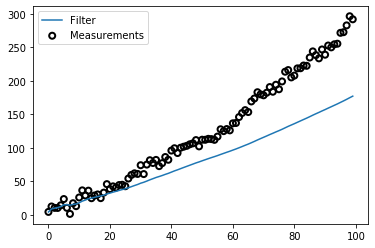

In [27]:
sensor_var = 20
process_var = 0.001
process_model = gaussian(1, process_var)
pos = gaussian(0, 500)
N = 100

dog = DogSimulation(pos.mean, 1, sensor_var, process_var * 10000)
zs, ps = [], []

for _ in range(N):
    dog.velocity += 0.04
    zs.append(dog.move_and_sense())

for i in range(N):
    prior = predict(pos, process_model)
    pos = update(prior, gaussian(zs[i], sensor_var))
    ps.append(pos.mean)

book_plots.plot_measurements(zs, lw = 1)
book_plots.plot_filter(ps)
plt.legend(loc = 2)

## Example: Bad Initial Estimate

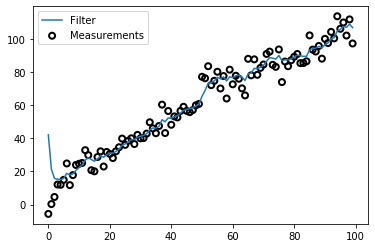

In [29]:
sensor_var = 5 ** 2
process_var = 2
process_model = gaussian(1, process_var)
pos = gaussian(1000, 500)
N = 100

dog = DogSimulation(0, 1, sensor_var, process_var)
zs = [dog.move_and_sense() for _ in range(N)]
ps = []

for i in range(N):
    prior = predict(pos, process_model)
    pos = update(prior, gaussian(zs[i], sensor_var))
    ps.append(pos.mean)

book_plots.plot_measurements(zs, lw = 1)
book_plots.plot_filter(ps)
plt.legend(loc = 2)

## Example: Large Noise and Bad Initial Estimate

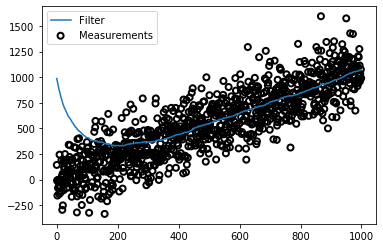

In [31]:
sensor_var = 30000
process_var = 2
process_model = gaussian(1, process_var)
pos = gaussian(1000, 500)
N = 1000

dog = DogSimulation(0, 1, sensor_var, process_var)
zs = [dog.move_and_sense() for _ in range(N)]
ps = []

for z in zs:
    prior = predict(pos, process_model)
    pos = update(prior, gaussian(z, sensor_var))
    ps.append(pos.mean)

book_plots.plot_measurements(zs, lw = 1)
book_plots.plot_filter(ps)
plt.legend(loc = 2)

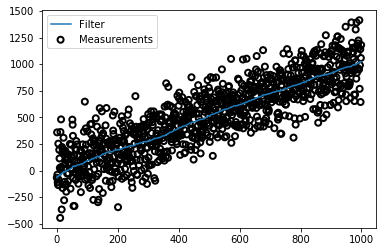

In [32]:
sensor_var = 30000
process_var = 2
process_model = gaussian(1, process_var)
N = 1000

dog = DogSimulation(0, 1, sensor_var, process_var)
zs = [dog.move_and_sense() for _ in range(N)]
ps = []

pos = gaussian(zs[0], 500)


for z in zs:
    prior = predict(pos, process_model)
    pos = update(prior, gaussian(z, sensor_var))
    ps.append(pos.mean)

book_plots.plot_measurements(zs, lw = 1)
book_plots.plot_filter(ps)
plt.legend(loc = 2)

## Exercise: Interactive Plots

In [36]:
def plot_kalman_filter(start_pos, sensor_noise, velocity, process_noise):
    sensor_var = sensor_noise
    process_var = process_noise
    process_model = gaussian(velocity, process_var)
    
    N = 20
    dog = DogSimulation(start_pos, velocity, sensor_var, process_var)
    
    ps = []
    zs =[dog.move_and_sense() for _ in range(N)]
    pos = gaussian(0, 1000)
    for z in zs:
        pos = predict(pos, process_model)
        pos = update(pos, gaussian(z, sensor_var))
        ps. append(pos.mean)
    plt.figure()
    book_plots.plot_measurements(zs, lw = 1)
    book_plots.plot_filter(ps)
    plt.legend(loc = 4)
    
interact(plot_kalman_filter, start_pos = (-10, 10), 
         sensor_noise = FloatSlider(value = 5, min = 0, max = 100),
         velocity = FloatSlider(value = 1, min = -2, max = 2), 
         process_noise = FloatSlider(value = 5, min = 0, max = 100))


interactive(children=(IntSlider(value=0, description='start_pos', max=10, min=-10), FloatSlider(value=5.0, des…

<function __main__.plot_kalman_filter(start_pos, sensor_noise, velocity, process_noise)>

## Exercise: Nonlinear Systems

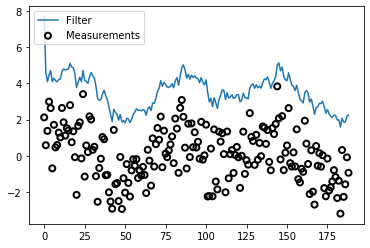

In [45]:
np.random.seed(0)
x = np.arange(0, 6*np.pi, 0.1)

sensor_var = 30
process_var = 2
process_model = gaussian(1, process_var)
N = np.shape(x)

zs = [np.sin(dx) + np.random.randn()*1.2 for dx in x]
ps = []
pos = gaussian(100, 500)

for z in zs:
    prior = predict(pos, process_model)
    pos = update(prior, gaussian(z, sensor_var))
    ps.append(pos.mean)

book_plots.plot_measurements(zs, lw = 1)
book_plots.plot_filter(ps)
plt.legend(loc = 2)


<font size="5"></font>
$$\huge \begin{align}
f_{x} &= v\Delta t = 15 \times 2 \\
\bar{x}_{k} &= 10 + (15 \times 2) = 40
\end{align}$$
\###